# Making Scraped Data Usable

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

SCRAPED_CSV = 'scraped_cars.csv'

## Load CSV and Review

In [26]:
df_raw = pd.read_csv(SCRAPED_CSV)
df = df_raw.copy() # keep a defensive copy of the original data
df.head()

,name,cylinders,weight,year,territory,acceleration,mpg,hp,displacement
0,Chevrolet Chevelle Malibu,8,3504,1970,USA,12.0,18.0,130.0,307.0
1,Buick Skylark 320,8,3693,1970,USA,11.5,15.0,165.0,350.0
2,Plymouth Satellite,8,3436,1970,USA,11.0,18.0,150.0,318.0
3,Amc Rebel Sst,8,3433,1970,USA,12.0,16.0,150.0,304.0
4,Ford Torino,8,3449,1970,USA,10.5,17.0,140.0,302.0


In [27]:
df.shape

(406, 9)

In [6]:
df.sample(5)

,name,cylinders,weight,year,territory,acceleration,mpg,hp,displacement
201,Amc Hornet,6,3085,1976,USA,17.6,22.5,90.0,232.0
85,Peugeot 504 (Sw),4,2979,1972,Europe,19.5,21.0,87.0,120.0
388,Nissan Stanza Xe,4,2160,1982,Japan,14.5,36.0,88.0,120.0
87,Ford Pinto (Sw),4,2395,1972,USA,16.0,22.0,86.0,122.0
351,Plymouth Champ,4,1875,1981,USA,16.4,39.0,64.0,86.0


In [7]:
df.describe()

,cylinders,weight,year,acceleration,mpg,hp,displacement
count,406.000000,406.000000,406.000000,406.000000,398.000000,400.000000,406.000000
mean,5.475369,2979.413793,1975.921182,15.519704,23.514573,105.082500,194.779557
std,1.712160,847.004328,3.748737,2.803359,7.815984,38.768779,104.922458
min,3.000000,1613.000000,1970.000000,8.000000,9.000000,46.000000,68.000000
25%,4.000000,2226.500000,1973.000000,13.700000,17.500000,75.750000,105.000000
50%,4.000000,2822.500000,1976.000000,15.500000,23.000000,95.000000,151.000000
75%,8.000000,3618.250000,1979.000000,17.175000,29.000000,130.000000,302.000000
max,8.000000,5140.000000,1982.000000,24.800000,46.600000,230.000000,455.000000


## Data Review Strategy

In [8]:
df.territory.value_counts()

USA       254
Japan      79
Europe     73
Name: territory, dtype: int64

In [9]:
df.cylinders.value_counts()

4    207
8    108
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [10]:
df.cylinders.value_counts().sort_index()

3      4
4    207
5      3
6     84
8    108
Name: cylinders, dtype: int64

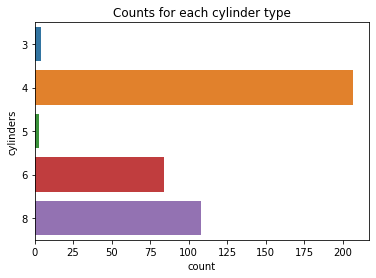

In [11]:
ax = sns.countplot(data=df, y='cylinders')
ax.set_title("Counts for each cylinder type");

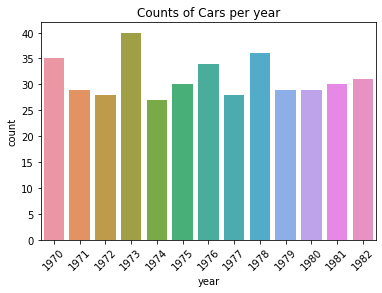

In [12]:
ax = sns.countplot(data=df, x='year')
ax.set_title("Counts of Cars per year");
plt.xticks(rotation=45);

In [13]:
df.isnull().sum()

name            0
cylinders       0
weight          0
year            0
territory       0
acceleration    0
mpg             8
hp              6
displacement    0
dtype: int64

In [14]:
df.mpg.isnull()[5:15]

5     False
6     False
7     False
8     False
9     False
10     True
11     True
12     True
13     True
14     True
Name: mpg, dtype: bool

In [15]:
df[df.mpg.isnull()]

,name,cylinders,weight,year,territory,acceleration,mpg,hp,displacement
10,Citroen Ds-21 Pallas,4,3090,1970,Europe,17.5,NaN,115.0,133.0
11,Chevrolet Chevelle Concours (Sw),8,4142,1970,USA,11.5,NaN,165.0,350.0
12,Ford Torino (Sw),8,4034,1970,USA,11.0,NaN,153.0,351.0
13,Plymouth Satellite (Sw),8,4166,1970,USA,10.5,NaN,175.0,383.0
14,Amc Rebel Sst (Sw),8,3850,1970,USA,11.0,NaN,175.0,360.0
17,Ford Mustang Boss 302,8,3353,1970,USA,8.0,NaN,140.0,302.0
39,Volkswagen Super Beetle 117,4,1978,1971,Europe,20.0,NaN,48.0,97.0
367,Saab 900S,4,2800,1981,Europe,15.4,NaN,110.0,121.0


In [28]:
df[df.hp.isnull()]

,name,cylinders,weight,year,territory,acceleration,mpg,hp,displacement
38,Ford Pinto,4,2046,1971,USA,19.0,25.0,NaN,98.0
133,Ford Maverick,6,2875,1974,USA,17.0,21.0,NaN,200.0
337,Renault Lecar Deluxe,4,1835,1980,Europe,17.3,40.9,NaN,85.0
343,Ford Mustang Cobra,4,2905,1980,USA,14.3,23.6,NaN,140.0
361,Renault 18I,4,2320,1981,Europe,15.8,34.5,NaN,100.0
382,Amc Concord Dl,4,3035,1982,USA,20.5,23.0,NaN,151.0


In [29]:
def highlight_max(s):
    '''Highlight the maximum in a Series yellow'''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

df.pivot_table(index=['year'], aggfunc='count').style.apply(highlight_max, axis=1)

,acceleration,cylinders,displacement,hp,mpg,name,territory,weight
year,,,,,,,,
1970,35,35,35,35,29,35,35,35
1971,29,29,29,28,28,29,29,29
1972,28,28,28,28,28,28,28,28
1973,40,40,40,40,40,40,40,40
1974,27,27,27,26,27,27,27,27
1975,30,30,30,30,30,30,30,30
1976,34,34,34,34,34,34,34,34
1977,28,28,28,28,28,28,28,28
1978,36,36,36,36,36,36,36,36


In [30]:
print(f"Before we drop NaN rows we have {df.shape} rows")
df = df.dropna()
print(f"After we drop NaN rows we have {df.shape} rows")

Before we drop NaN rows we have (406, 9) rows
After we drop NaN rows we have (392, 9) rows


In [31]:
df.cylinders.value_counts().sort_index()

3      4
4    199
5      3
6     83
8    103
Name: cylinders, dtype: int64

In [32]:
df = df.query("cylinders != 3 and cylinders != 5").copy()
df.cylinders.value_counts().sort_index()

4    199
6     83
8    103
Name: cylinders, dtype: int64

In [33]:
df['cylinders_label'] = df.cylinders.apply(lambda v: f"{v} cylinders")
df.cylinders.value_counts().sort_index()

4    199
6     83
8    103
Name: cylinders, dtype: int64

## What Distribution Does MPG Have?

Examples of MPG values: [15.5, 16.0, 16.5, 18.0, 19.8, 19.9, 27.0, 28.0, 31.0, 33.0]


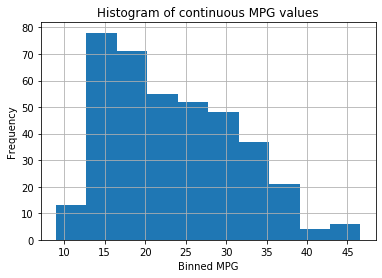

In [35]:
print(f"Examples of MPG values: {list(df.mpg.sample(10).sort_values())}")
ax = df.mpg.hist()
ax.set_ylabel('Frequency')
ax.set_xlabel('Binned MPG')
ax.set_title('Histogram of continuous MPG values');

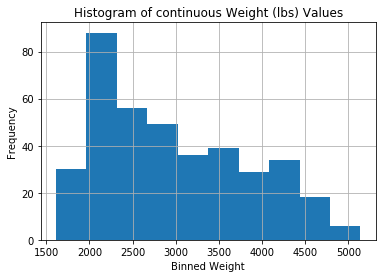

In [36]:
ax = df.weight.hist()
ax.set_ylabel('Frequency')
ax.set_xlabel('Binned Weight')
ax.set_title('Histogram of continuous Weight (lbs) Values');

## Reviewing Our Goal 

In [37]:
df.pivot_table(index=['year'], aggfunc='mean')

,acceleration,cylinders,displacement,hp,mpg,weight
year,,,,,,
1970,12.948276,6.758621,281.413793,147.827586,17.689655,3372.793103
1971,15.000000,5.629630,213.888889,107.037037,21.111111,3030.592593
1972,15.185185,5.925926,223.870370,121.037037,18.703704,3271.333333
1973,14.333333,6.461538,261.666667,131.512821,17.076923,3452.230769
1974,16.173077,5.230769,170.653846,94.230769,22.769231,2878.038462
1975,16.050000,5.600000,205.533333,101.066667,20.266667,3176.800000
1976,15.941176,5.647059,197.794118,101.117647,21.573529,3078.735294
1977,15.507407,5.555556,195.518519,104.888889,23.444444,3007.629630
1978,15.802857,5.371429,179.142857,99.600000,24.168571,2862.714286


## What Correlates with MPG?

In [39]:
df.corr()['mpg'].sort_values()

weight         -0.842681
displacement   -0.817887
cylinders      -0.794872
hp             -0.780259
acceleration    0.419337
year            0.579778
mpg             1.000000
Name: mpg, dtype: float64

### Exploring MPG vs. Weight

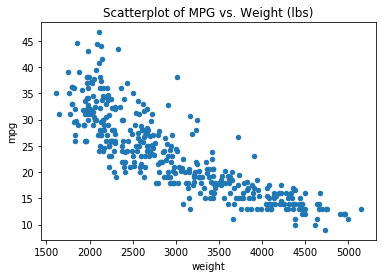

In [40]:
ax = df.plot(kind="scatter", x="weight", y="mpg")
ax.set_title('Scatterplot of MPG vs. Weight (lbs)');

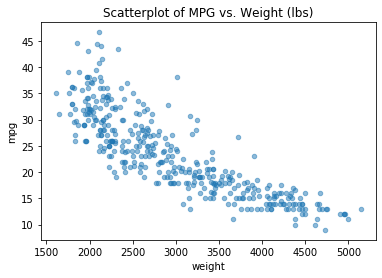

In [41]:
ax = df.plot(kind="scatter", x="weight", y="mpg", alpha=0.5)
ax.set_title('Scatterplot of MPG vs. Weight (lbs)');

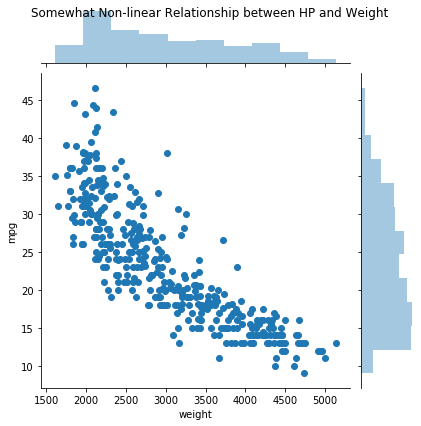

In [42]:
jg = sns.jointplot(data=df, x="weight", y="mpg");
jg.fig.suptitle('Somewhat Non-linear Relationship between HP and Weight');

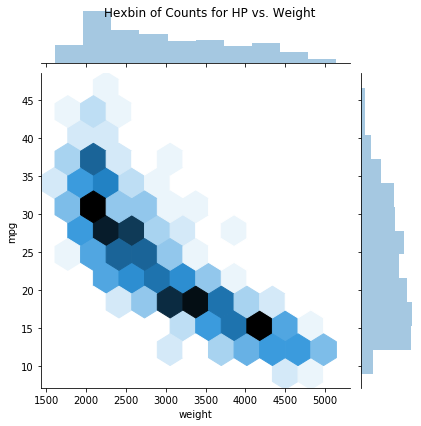

In [43]:
jg = sns.jointplot(data=df, x="weight", y="mpg", kind='hexbin');
jg.fig.suptitle('Hexbin of Counts for HP vs. Weight');

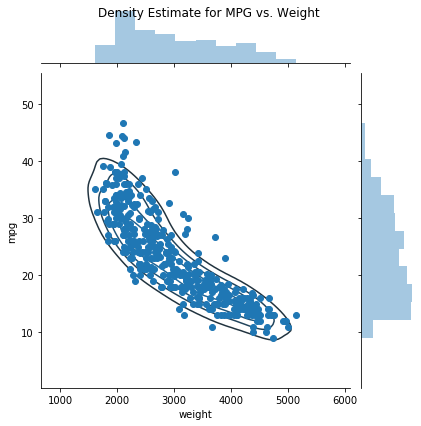

In [44]:
jg = sns.jointplot(data=df, x="weight", y="mpg").plot_joint(sns.kdeplot, zorder=0, n_levels=5);
jg.fig.suptitle('Density Estimate for MPG vs. Weight');

### Exploring HP vs. Weight

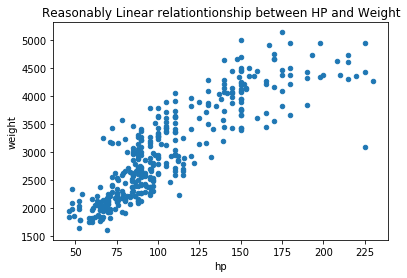

In [46]:
ax = df.plot(kind="scatter", x="hp", y="weight")
ax.set_title('Reasonably Linear relationtionship between HP and Weight');

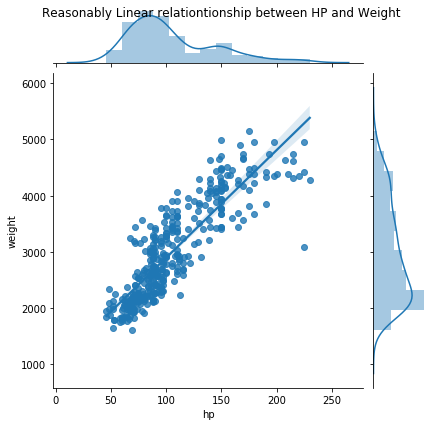

In [49]:
jg = sns.jointplot(data=df, x="hp", y="weight", kind='reg');
jg.fig.suptitle('Reasonably Linear relationtionship between HP and Weight');

In [50]:
df.query("hp > 200 and weight < 3500") # fully equiped luxury entrant

,name,cylinders,weight,year,territory,acceleration,mpg,hp,displacement,cylinders_label
19,Buick Estate Wagon (Sw),8,3086,1970,USA,10.0,14.0,225.0,455.0,8 cylinders


## Cylinders and Displacement

In [51]:
sorted_cylinders_label = df.cylinders_label.value_counts().sort_index().index
sorted_cylinders_label

Index(['4 cylinders', '6 cylinders', '8 cylinders'], dtype='object')

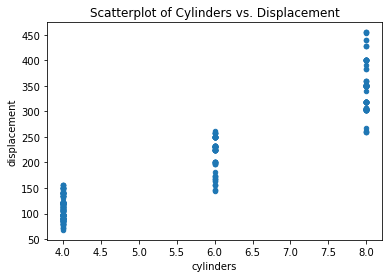

In [52]:
ax = df.plot(kind="scatter", x="cylinders", y="displacement")
ax.set_title('Scatterplot of Cylinders vs. Displacement');

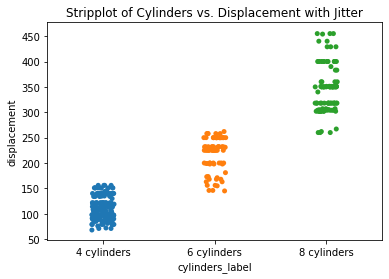

In [54]:
ax = sns.stripplot(data=df, x="cylinders_label", y="displacement", order=sorted_cylinders_label)
ax.set_title('Stripplot of Cylinders vs. Displacement with Jitter');

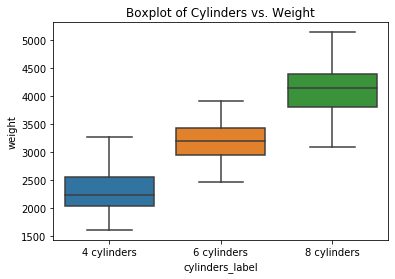

In [55]:
ax = sns.boxplot(data=df, x="cylinders_label", y="weight", order=sorted_cylinders_label)
ax.set_title('Boxplot of Cylinders vs. Weight');

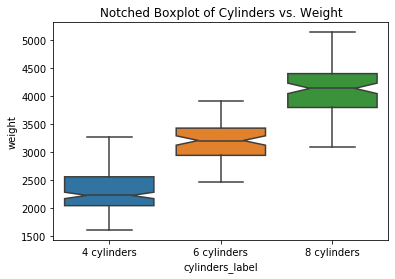

In [57]:
ax = sns.boxplot(data=df, x="cylinders_label", y="weight", order=sorted_cylinders_label, notch=True)
ax.set_title('Notched Boxplot of Cylinders vs. Weight');

## Looking at MPG over Time

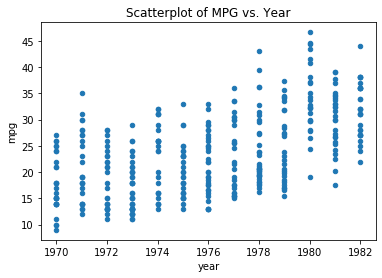

In [58]:
ax = df.plot(kind="scatter", x="year", y="mpg")
ax.set_title('Scatterplot of MPG vs. Year');

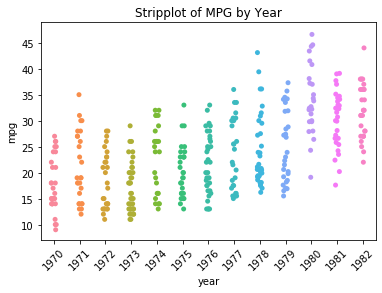

In [60]:
ax = sns.stripplot(data=df, x="year", y="mpg")
ax.set_title('Stripplot of MPG by Year');
plt.xticks(rotation=45);

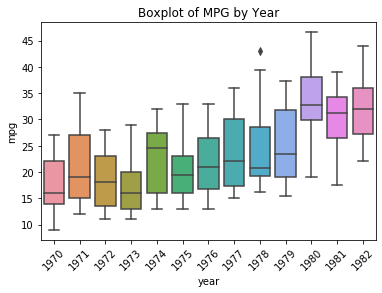

In [61]:
ax = sns.boxplot(data=df, x="year", y="mpg")
ax.set_title('Boxplot of MPG by Year');
plt.xticks(rotation=45);

In [63]:
df.query("year == 1978 and mpg > 40")

,name,cylinders,weight,year,territory,acceleration,mpg,hp,displacement,cylinders_label
251,Volkswagen Rabbit Custom Diesel,4,1985,1978,Europe,21.5,43.1,48.0,90.0,4 cylinders


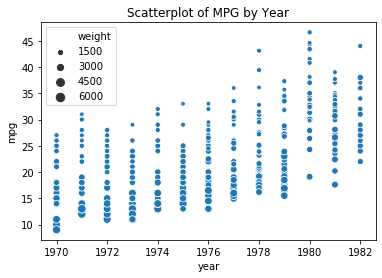

In [64]:
ax = sns.scatterplot(data=df, x="year", y="mpg", size="weight")
ax.set_title('Scatterplot of MPG by Year');

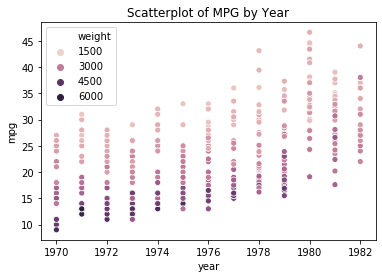

In [65]:
ax = sns.scatterplot(data=df, x="year", y="mpg", hue="weight")
ax.set_title('Scatterplot of MPG by Year');

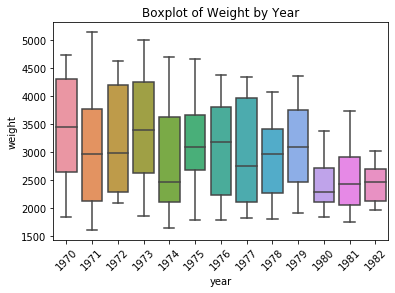

In [66]:
ax = sns.boxplot(data=df, x="year", y="weight")
ax.set_title('Boxplot of Weight by Year');
plt.xticks(rotation=45);

## Text Analysis

In [67]:
df.head()

,name,cylinders,weight,year,territory,acceleration,mpg,hp,displacement,cylinders_label
0,Chevrolet Chevelle Malibu,8,3504,1970,USA,12.0,18.0,130.0,307.0,8 cylinders
1,Buick Skylark 320,8,3693,1970,USA,11.5,15.0,165.0,350.0,8 cylinders
2,Plymouth Satellite,8,3436,1970,USA,11.0,18.0,150.0,318.0,8 cylinders
3,Amc Rebel Sst,8,3433,1970,USA,12.0,16.0,150.0,304.0,8 cylinders
4,Ford Torino,8,3449,1970,USA,10.5,17.0,140.0,302.0,8 cylinders


In [71]:
ser_car_makes = df.name.str.lower().str.split(n=1, expand=True)[0]
ser_car_makes.value_counts()[:10]

ford          48
chevrolet     43
plymouth      31
dodge         28
amc           27
toyota        25
datsun        23
buick         17
pontiac       16
volkswagen    15
Name: 0, dtype: int64

In [72]:
ser_car_makes.value_counts()[-10:]

mercedes-benz    2
cadillac         2
maxda            1
nissan           1
chevroelt        1
triumph          1
capri            1
vokswagen        1
toyouta          1
hi               1
Name: 0, dtype: int64

In [76]:
df['car_makes'] = ser_car_makes
ser_cars_by_territory = df[['territory', 'car_makes']].pivot_table(index=['territory', 'car_makes'], aggfunc='size')
df_cars_by_territory = pd.DataFrame(ser_cars_by_territory) # anonymous Series
df_cars_by_territory.columns = ['size'] # rename anonymous column 0 to a named column
df_cars_by_territory = df_cars_by_territory.sort_values(by=['territory', 'size'], ascending=False)
df_cars_by_territory

size
territory car_makes          
USA       ford             48
          chevrolet        43
          plymouth         31
          dodge            28
          amc              27
          buick            17
          pontiac          16
          mercury          11
          oldsmobile       10
          chrysler          6
          chevy             3
          cadillac          2
          capri             1
          chevroelt         1
          hi                1
Japan     toyota           25
          datsun           23
          honda            13
          mazda             7
          subaru            4
          maxda             1
          nissan            1
          toyouta           1
Europe    volkswagen       15
          fiat              8
          peugeot           8
          volvo             6
          vw                6
          audi              5
          opel              4
          saab              4
          renault           3
          bmw               2
          mercedes-benz     2
          triumph           1
          vokswagen         1

In [79]:
mask = df_cars_by_territory.apply(lambda x: x['size'] > 10, axis=1)
df_cars_by_territory[mask]

size
territory car_makes       
USA       ford          48
          chevrolet     43
          plymouth      31
          dodge         28
          amc           27
          buick         17
          pontiac       16
          mercury       11
Japan     toyota        25
          datsun        23
          honda         13
Europe    volkswagen    15

### Report

This report answers the following questions:

* Is there a relationship between Weight and MPG - yes, with more weight we generally see lower MPG
* Is there a relationship between Cylinders and Displacement - yes, with more cylinders we see a higher displacement
* Is there a relationship between MPG and Years - yes, generally as we move from 1970 to 1982 we see steady improvements in MPG

In [81]:
print(f"df_raw had shape {df_raw.shape}, after dropping NaN entries we \
reduced from {df_raw.shape[0]} to {df.shape[0]} rows.")

assert((df.mpg >= 7) & (df.mpg <= 47)).all(), "Why do we see a wider range of MPG values now?"
assert((df.year >= 1970) & (df.year <= 1982)).all(), "Why do we see a wider range of years now?"

df_raw had shape (406, 9), after dropping NaN entries we reduced from 406 to 385 rows.


As weight increases we see a decrease in MPG, this relationship is slightly non-linear with a faster decrease in MPG associated with low-to-mid Weight.

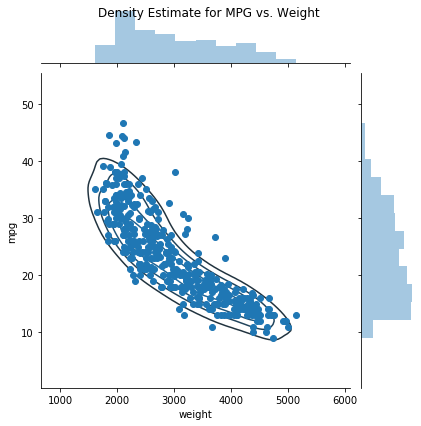

In [82]:
jg = sns.jointplot(data=df, x="weight", y="mpg").plot_joint(sns.kdeplot, zorder=0, n_levels=5);
jg.fig.suptitle('Density Estimate for MPG vs. Weight');

Acceleration gets worse as Horsepower decreases.

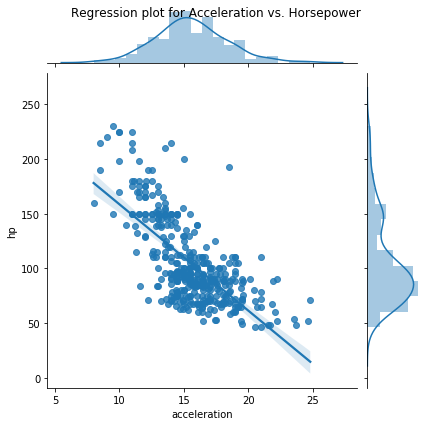

In [83]:
jg = sns.jointplot(data=df, x="acceleration", y="hp", kind='reg')
jg.fig.suptitle('Regression plot for Acceleration vs. Horsepower');

An engine's cubic inches of displacement is strongly related to the count of Cylinders.

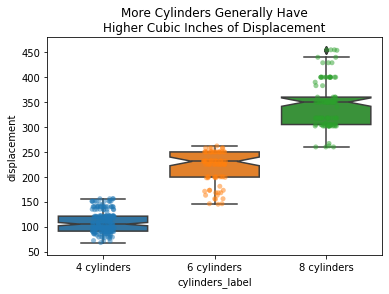

In [84]:
ax = sns.boxplot(data=df, x="cylinders_label", y="displacement", order=sorted_cylinders_label, notch=True)
sns.stripplot(data=df, x="cylinders_label", y="displacement", order=sorted_cylinders_label, alpha=0.5, ax=ax)
ax.set_title('More Cylinders Generally Have\nHigher Cubic Inches of Displacement');

Heavier vehicles tend to have more Horsepower, the heaviest vehicles have the highest count of Cylinders.

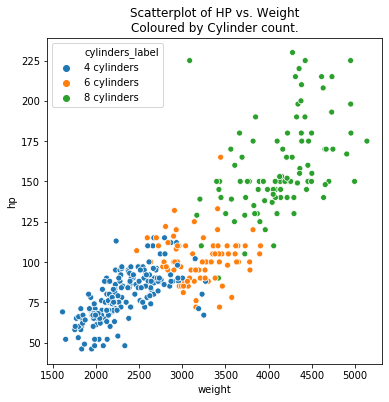

In [87]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(data=df, x="weight", y="hp", hue="cylinders_label", hue_order=sorted_cylinders_label, ax=ax)
ax.set_title('Scatterplot of HP vs. Weight\nColoured by Cylinder count.');

Vehicle brands are strongly associated with territory.

In [89]:
cm = sns.light_palette("green", as_cmap=True)
mask = df_cars_by_territory.apply(lambda x: x['size'] > 10, axis=1)
df_cars_by_territory[mask].style.background_gradient(cmap=cm)

Vehicles from the USA consistently have worse MPG than corresponding vehicles from Japan or Europe in this sample. Vehicles in each territory become more efficient over the years.

Text(0.5, 0.98, 'MPG over year by Territory')

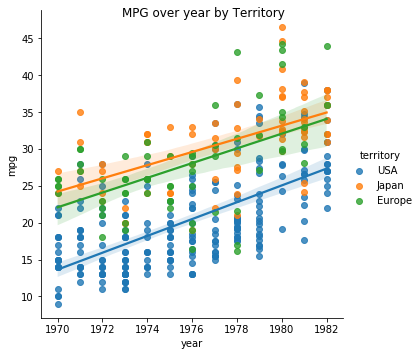

In [90]:
fg = sns.lmplot(data=df, x="year", y="mpg", hue="territory")
fg.fig.suptitle('MPG over year by Territory')